In [1]:
import pandas as pd
import numpy as np
import math
import os
from test_class import Test
os.environ['PYTHONHASHSEED'] = str(50)
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from distribute_data import *
import tensorflow as tf
from confeddi import FederatedSystem

In [2]:
rounds = 50
dataset = pd.read_csv('RTT_data.csv')
data_args = {
    'data seed': 12, #was 11
    'distance clients': [0, 2, 3, 6],
    'distance augments': [0.5, 0.5, 0.5, 0.5],
    'tolerance': 5,
    'exclude dtypes': 'object',
    'drop labels': ['GroundTruthRange[m]'],
    'target labels': ['GroundTruthRange[m]'],
    'test size 1': 0.2,
    'test size 2': 0.25,
    'normalize': True,
    'client num': 10
}

Mt = (np.ones(rounds) * 5).astype('int32')
model_seed = 50
test = Test(dataset, data_args, Mt, model_seed)

In [3]:
test.split(scheme = 1)

In [4]:
w, b, fedavg_loss, fedavg_log = test.run_fedavg_test(rounds = 50, frac_clients = 0.5)

Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


In [5]:
fedavg_avg_error = test.average_error((w, b))[0]
fedavg_avg_error

0.2068257387056491

In [6]:
w, b, conf_loss, conf_log = test.run_confeddi_test(1000, 1, rounds = 50, context = [0])

Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


In [7]:
conf_avg_error = test.average_error((w, b))[0]
conf_avg_error

0.2323448238606829

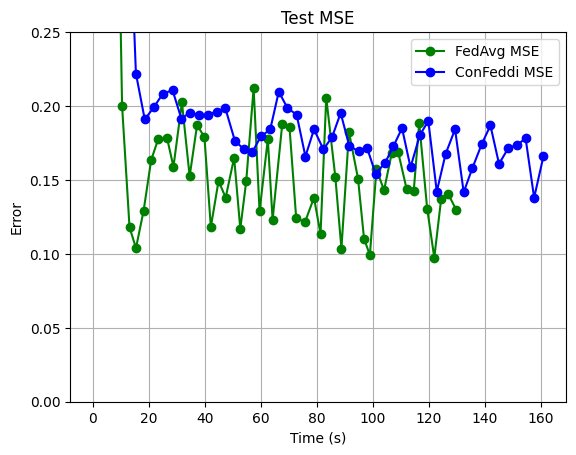

In [8]:
test.plot_error([(fedavg_log, fedavg_loss), (conf_log, conf_loss)], ['green', 'blue'], ['FedAvg MSE', 'ConFeddi MSE'], (0, 0.25))

In [3]:
test.split(scheme = 3, args = (3, 4))

In [4]:
w, b, fedavg_loss, fedavg_log = test.run_fedavg_test(rounds = 50, frac_clients = (5/12))

Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


In [5]:
test.average_error((w, b))

(2.8618206443941556, 15.303610801696777)

In [8]:
w, b, conf_loss, conf_log = test.run_confeddi_test(1, 1000, rounds = 50, context = [0, 2])

Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


In [9]:
test.average_error((w, b))

(2.6043657817732817, 11.951516151428223)

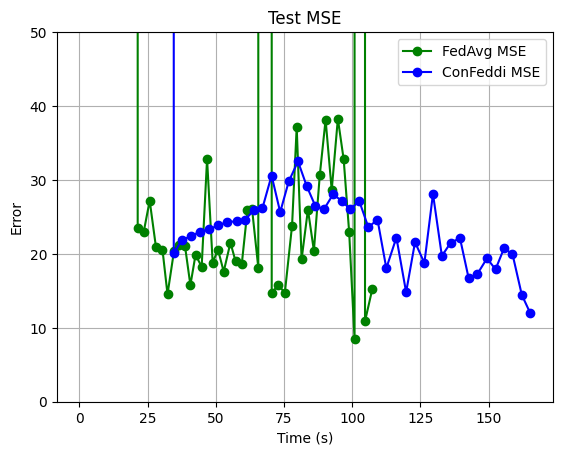

In [13]:
test.plot_error([(fedavg_log, fedavg_loss), (conf_log, conf_loss)], ['green', 'blue'], ['FedAvg MSE', 'ConFeddi MSE'], (0, 50))

In [ ]:
pairs = [(fedavg_log, fedavg_loss), (conf_log, conf_loss)]
colors = ['green', 'blue']
labels = ['FedAvg MSE', 'ConFeddi MSE']
ylim = (0, 50)
plt.title('Test MSE')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.ylim(ylim[0], ylim[1])
plt.grid()
plt.legend()
plt.show()